In [1]:
import os
os.chdir("..")

In [2]:
import re
import json
import numpy as np
import pandas as pd
import yaml
import time
import glob

import matplotlib.pyplot as plt
# import matplotlib.cm as cm
# import matplotlib.ticker as ticker

plt.style.use("seaborn-v0_8-whitegrid")
# colors = cm.get_cmap('tab10', len(k_list))

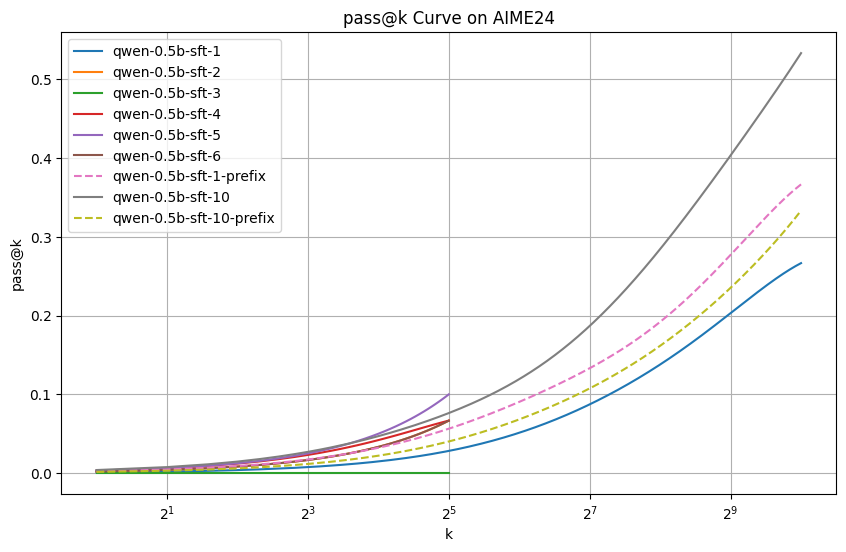

In [13]:
all_metrics = {}

with open("runs/aime24.qwen2.5-0.5b/finished/sft_ep1.direct/sample_1/metrics.12.25,19:2.json", encoding='utf-8') as f:
    all_metrics['qwen-0.5b-sft-1'] = json.load(f)['overall']

with open("runs/aime24.qwen2.5-0.5b/finished/sft_ep2.direct/sample_1/metrics.12.25,19:54.json", encoding='utf-8') as f:
    all_metrics['qwen-0.5b-sft-2'] = json.load(f)['overall']

with open("runs/aime24.qwen2.5-0.5b/sft_ep3/sample_1/metrics.12.25,20:10.json", encoding='utf-8') as f:
    all_metrics['qwen-0.5b-sft-3'] = json.load(f)['overall']

with open("runs/aime24.qwen2.5-0.5b/sft_ep4/sample_1/metrics.12.25,20:10.json", encoding='utf-8') as f:
    all_metrics['qwen-0.5b-sft-4'] = json.load(f)['overall']

with open("runs/aime24.qwen2.5-0.5b/sft_ep5/sample_1/metrics.12.25,20:10.json", encoding='utf-8') as f:
    all_metrics['qwen-0.5b-sft-5'] = json.load(f)['overall']

with open("runs/aime24.qwen2.5-0.5b/sft_ep6/sample_1/metrics.12.25,20:10.json", encoding='utf-8') as f:
    all_metrics['qwen-0.5b-sft-6'] = json.load(f)['overall']

with open("runs/aime24.qwen2.5-0.5b/finished/sft_ep1.prefix/sample_1/metrics.12.25,19:2.json", encoding='utf-8') as f:
    all_metrics['qwen-0.5b-sft-1-prefix'] = json.load(f)['overall']

with open("runs/aime24.qwen2.5-0.5b/finished/sft_ep10.direct/sample_1/metrics.12.25,19:38.json", encoding='utf-8') as f:
    all_metrics['qwen-0.5b-sft-10'] = json.load(f)['overall']

with open("runs/aime24.qwen2.5-0.5b/finished/sft_ep10.prefix/sample_1/metrics.12.25,19:38.json", encoding='utf-8') as f:
    all_metrics['qwen-0.5b-sft-10-prefix'] = json.load(f)['overall']



plt.figure(figsize=(10,6))

for model_name, metrics in all_metrics.items():
    pass_at_k = metrics['pass_at_k']
    ks = [int(k.split('@')[1]) for k in pass_at_k.keys()]
    values = [pass_at_k[f'pass@{k}'] for k in ks]
    if 'prefix' in model_name:
        plt.plot(ks, values, label=model_name, linestyle='--')
    else:
        plt.plot(ks, values, label=model_name)

plt.xlabel('k')
plt.ylabel('pass@k')
plt.title('pass@k Curve on AIME24')
plt.xscale('log', base=2)
plt.grid(True)
plt.legend()
plt.show()

In [26]:
import glob
import os

# epoch_files = [
#     # (1, 'qwen-0.5b-sft-1', "runs/aime24.qwen2.5-0.5b/finished/sft_ep1.direct/sample_1/metrics.12.25,19:2.json"),
#     # (2, 'qwen-0.5b-sft-2', "runs/aime24.qwen2.5-0.5b/finished/sft_ep2.direct/sample_1/metrics.12.25,19:54.json"),
#     # (3, 'qwen-0.5b-sft-3', "runs/aime24.qwen2.5-0.5b/sft_ep3/sample_1/metrics.12.25,20:10.json"),
#     # (4, 'qwen-0.5b-sft-4', "runs/aime24.qwen2.5-0.5b/sft_ep4/sample_1/metrics.12.25,20:10.json"),
#     # (5, 'qwen-0.5b-sft-5', "runs/aime24.qwen2.5-0.5b/sft_ep5/sample_1/metrics.12.25,20:10.json"),
#     # (6, 'qwen-0.5b-sft-6', "runs/aime24.qwen2.5-0.5b/sft_ep6/sample_1/metrics.12.25,20:10.json"),
#     # (7, 'qwen-0.5b-sft-7', "runs/aime24.qwen2.5-0.5b/sft_ep7/sample_1/metrics.12.25,20:11.json"),
#     # (8, 'qwen-0.5b-sft-8', "runs/aime24.qwen2.5-0.5b/sft_ep8/sample_1/metrics.12.25,20:16.json"),
#     # (9, 'qwen-0.5b-sft-9', "runs/aime24.qwen2.5-0.5b/sft_ep9/sample_1/metrics.12.25,20:16.json"),
#     # (10, 'qwen-0.5b-sft-10', "runs/aime24.qwen2.5-0.5b/finished/sft_ep10.direct/sample_1/metrics.12.25,19:38.json"),

#     (1, 'qwen-0.5b-sft-1', "runs/metamath.qwen2.5-0.5b/sft_ep1.direct/sample_1/metrics.12.25,19:2.json"),
#     (2, 'qwen-0.5b-sft-2', "runs/metamath.qwen2.5-0.5b/sft_ep2.direct/sample_1/metrics.12.25,19:54.json"),
#     (3, 'qwen-0.5b-sft-3', "runs/metamath.qwen2.5-0.5b/sft_ep3.direct/sample_1/metrics.12.25,20:10.json"),
#     (4, 'qwen-0.5b-sft-4', "runs/metamath.qwen2.5-0.5b/sft_ep4.direct/sample_1/metrics.12.25,20:10.json"),
#     (5, 'qwen-0.5b-sft-5', "runs/metamath.qwen2.5-0.5b/sft_ep5.direct/sample_1/metrics.12.25,20:10.json"),
#     (6, 'qwen-0.5b-sft-6', "runs/metamath.qwen2.5-0.5b/sft_ep6.direct/sample_1/metrics.12.25,20:10.json"),
#     (7, 'qwen-0.5b-sft-7', "runs/metamath.qwen2.5-0.5b/sft_ep7.direct/sample_1/metrics.12.25,20:11.json"),
#     (8, 'qwen-0.5b-sft-8', "runs/metamath.qwen2.5-0.5b/sft_ep8.direct/sample_1/metrics.12.25,20:16.json"),
#     (9, 'qwen-0.5b-sft-9', "runs/metamath.qwen2.5-0.5b/sft_ep9.direct/sample_1/metrics.12.25,20:16.json"),
#     (10, 'qwen-0.5b-sft-10', "runs/metamath.qwen2.5-0.5b/sft_ep10.direct/sample_1/metrics.12.25,19:38.json"),
    
#     # Prefix and other variants can have their own entries if desired:
#     # (1, 'qwen-0.5b-sft-1-prefix', "runs/aime24.qwen2.5-0.5b/finished/sft_ep1.prefix/sample_1/metrics.12.25,19:2.json"),
#     # (10, 'qwen-0.5b-sft-10-prefix', "runs/aime24.qwen2.5-0.5b/finished/sft_ep10.prefix/sample_1/metrics.12.25,19:38.json"),
# ]

epoch_files_1 = []
for ep in range(1, 11):
    # Find newest metrics file for sft_ep1.direct in the runs/metamath.qwen2.5-0.5b directory
    # metrics_files = glob.glob(f'runs/metamath.qwen2.5-0.5b/sft_ep{ep}.direct/sample_1/metrics.*.json')
    # metrics_files = glob.glob(f'runs/gsm8k_prompt2.qwen2.5-0.5b/finished/sft_ep{ep}.direct/sample_1/metrics.*.json')
    # metrics_files = glob.glob(f'runs/gsm8k.qwen2.5-0.5b-metaninstruct1/sft_ep{ep}.direct/sample_2/metrics.*.json')
    # metrics_files = glob.glob(f'runs/gsm8k.qwen2.5-0.5b-mutual_metaninstruct1/finished/sft_ep{ep}.direct/sample_2/metrics.*.json')
    
    metrics_files = glob.glob(f'runs/gsm8k.evolm-1b-exclusive_styles/finished/sft_ep{ep}.direct/sample_1/metrics.*.json')

    if metrics_files:
        # Sort by modification time, descending
        newest_metrics_file = max(metrics_files, key=os.path.getmtime)
        print(f"Newest metrics file for sft_ep{ep}.direct:", newest_metrics_file)
        epoch_files_1.append((ep, f"qwen-0.5b-sft-{ep}" ,newest_metrics_file))
    else:
        print(f"No metrics files found for sft_ep{ep}.direct")

epoch_files_2 = []
for ep in range(1, 11):
    # Find newest metrics file for sft_ep1.direct in the runs/metamath.qwen2.5-0.5b directory
    # metrics_files = glob.glob(f'runs/metamath.qwen2.5-0.5b/sft_ep{ep}.direct/sample_1/metrics.*.json')
    # metrics_files = glob.glob(f'runs/gsm8k_prompt2.qwen2.5-0.5b/finished/sft_ep{ep}.direct/sample_1/metrics.*.json')
    # metrics_files = glob.glob(f'runs/gsm8k.qwen2.5-0.5b-metaninstruct1/sft_ep{ep}.direct/sample_2/metrics.*.json')
    # metrics_files = glob.glob(f'runs/gsm8k.qwen2.5-0.5b-mutual_metaninstruct1/finished/sft_ep{ep}.direct/sample_2/metrics.*.json')

    metrics_files = glob.glob(f'/home/nlp/hnn5071/vreval_runs/gsm8k.evolm-1b-mutual_styles/sft_ep{ep}.direct/sample_1/metrics.*.json')


    if metrics_files:
        # Sort by modification time, descending
        newest_metrics_file = max(metrics_files, key=os.path.getmtime)
        print(f"Newest metrics file for sft_ep{ep}.direct:", newest_metrics_file)
        epoch_files_2.append((ep, f"qwen-0.5b-sft-{ep}" ,newest_metrics_file))
    else:
        print(f"No metrics files found for sft_ep{ep}.direct")

Newest metrics file for sft_ep1.direct: runs/gsm8k.evolm-1b-exclusive_styles/finished/sft_ep1.direct/sample_1/metrics.1.9,18:33.json
Newest metrics file for sft_ep2.direct: runs/gsm8k.evolm-1b-exclusive_styles/finished/sft_ep2.direct/sample_1/metrics.1.9,18:58.json
Newest metrics file for sft_ep3.direct: runs/gsm8k.evolm-1b-exclusive_styles/finished/sft_ep3.direct/sample_1/metrics.1.9,18:59.json
Newest metrics file for sft_ep4.direct: runs/gsm8k.evolm-1b-exclusive_styles/finished/sft_ep4.direct/sample_1/metrics.1.9,19:0.json
Newest metrics file for sft_ep5.direct: runs/gsm8k.evolm-1b-exclusive_styles/finished/sft_ep5.direct/sample_1/metrics.1.9,19:10.json
Newest metrics file for sft_ep6.direct: runs/gsm8k.evolm-1b-exclusive_styles/finished/sft_ep6.direct/sample_1/metrics.1.9,19:43.json
Newest metrics file for sft_ep7.direct: runs/gsm8k.evolm-1b-exclusive_styles/finished/sft_ep7.direct/sample_1/metrics.1.9,19:43.json
Newest metrics file for sft_ep8.direct: runs/gsm8k.evolm-1b-exclusive_

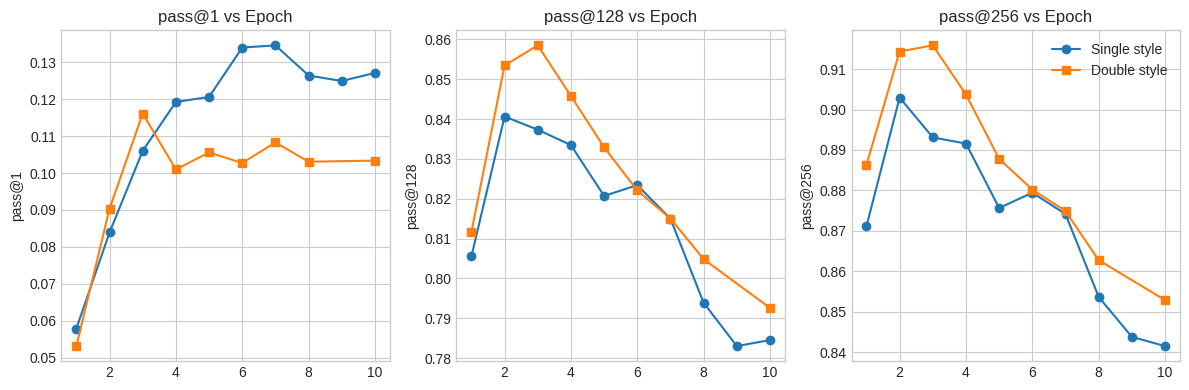

In [27]:
all_metrics = {}
# Map from epoch number to (label, filename)

k_list = [1, 128, 256]
epochs = []
pass_k = {k: [] for k in k_list}

epochs_2 = []
pass_k_2 = {k: [] for k in k_list}

problem_idx = 10
for epoch, label, fname in epoch_files_1:
    with open(fname, encoding='utf-8') as f:
        metrics = json.load(f)['overall']
        pass_at_k = metrics['pass_at_k']
        # pass_at_k = metrics['detail_pass_at_k']
        # For safety, prefer safe index with fallback
        def get_metric(pk):
            if pk in pass_at_k:
                # return pass_at_k[pk][problem_idx]
                return pass_at_k[pk]
            # Try numeric keys if present
            if isinstance(pass_at_k, dict):
                for k in pass_at_k.keys():
                    if str(pk) == k or pk == k:
                        return pass_at_k[k]
            return float('nan')
        epochs.append(epoch)

        for k in k_list:
            pass_k[k].append(get_metric(f'pass@{k}'))

for epoch, label, fname in epoch_files_2:
    with open(fname, encoding='utf-8') as f:
        metrics = json.load(f)['overall']
        pass_at_k = metrics['pass_at_k']
        # pass_at_k = metrics['detail_pass_at_k']
        # For safety, prefer safe index with fallback
        def get_metric(pk):
            if pk in pass_at_k:
                # return pass_at_k[pk][problem_idx]
                return pass_at_k[pk]
            # Try numeric keys if present
            if isinstance(pass_at_k, dict):
                for k in pass_at_k.keys():
                    if str(pk) == k or pk == k:
                        return pass_at_k[k]
            return float('nan')
        epochs_2.append(epoch)

        for k in k_list:
            pass_k_2[k].append(get_metric(f'pass@{k}'))

# X axis: epoch
# Y axis: pass@1, pass@16, pass@32
# fig, axs = plt.subplots(1, 1, figsize=(4, 4), sharex=True)

fig, axs = plt.subplots(1, len(k_list), figsize=(4 * len(k_list), 4), sharex=True)



for i, k in enumerate(k_list):
    axs[i].plot(epochs, pass_k[k], marker='o', label=f'Single style')
    axs[i].plot(epochs_2, pass_k_2[k], marker='s', label=f'Double style')
    axs[i].set_ylabel(f'pass@{k}')
    axs[i].set_title(f'pass@{k} vs Epoch')
    # axs[i].set_ylim(0, 1.1)

# axs[1].plot(epochs, pass16, marker='o')
# axs[1].set_ylabel('pass@16')
# axs[1].set_title('pass@16 vs Epoch')

# axs[2].plot(epochs, pass32, marker='o')
# axs[2].set_xlabel('Epoch')
# axs[2].set_ylabel('pass@32')
# axs[2].set_title('pass@32 vs Epoch')

plt.legend()
plt.tight_layout()
plt.show()

In [14]:
epoch_files = []
for ep in [1,2,3,4,5,6,7,8,9, 10]:
    # Find newest metrics file for sft_ep1.direct in the runs/metamath.qwen2.5-0.5b directory
    # metrics_files = glob.glob(f'runs/legostar.qwen2.5-0.5b/finished/sft_ep{ep}.direct/sample_1/metrics.*.json')
    # metrics_files = glob.glob(f'runs/legonostar.qwen2.5-0.5b/sft_ep{ep}.direct/sample_2/metrics.*.json')
    # metrics_files = glob.glob(f'runs/legostar.qwen2.5-0.5b-nostartraining/sft_ep{ep}.direct/sample_2/metrics.*.json')

    # metrics_files = glob.glob(f'runs/gsm8k.evolm-1b-exclusive_styles/sft_ep{ep}.direct/sample_1/metrics.*.json')

    metrics_files = glob.glob(f'/home/nlp/hnn5071/vreval_runs/gsm8k.evolm-1b-mutual_styles/sft_ep{ep}.direct/sample_1/metrics.*.json')

    if metrics_files:
        # Sort by modification time, descending
        newest_metrics_file = max(metrics_files, key=os.path.getmtime)
        print(f"Newest metrics file for sft_ep{ep}.direct:", newest_metrics_file)
        epoch_files.append((ep, f"qwen-0.5b-sft-{ep}" ,newest_metrics_file))
    else:
        print(f"No metrics files found for sft_ep{ep}.direct")
    

Newest metrics file for sft_ep1.direct: /home/nlp/hnn5071/vreval_runs/gsm8k.evolm-1b-mutual_styles/sft_ep1.direct/sample_1/metrics.1.9,20:43.json
No metrics files found for sft_ep2.direct
Newest metrics file for sft_ep3.direct: /home/nlp/hnn5071/vreval_runs/gsm8k.evolm-1b-mutual_styles/sft_ep3.direct/sample_1/metrics.1.10,0:20.json
Newest metrics file for sft_ep4.direct: /home/nlp/hnn5071/vreval_runs/gsm8k.evolm-1b-mutual_styles/sft_ep4.direct/sample_1/metrics.1.10,0:20.json
Newest metrics file for sft_ep5.direct: /home/nlp/hnn5071/vreval_runs/gsm8k.evolm-1b-mutual_styles/sft_ep5.direct/sample_1/metrics.1.10,0:20.json
Newest metrics file for sft_ep6.direct: /home/nlp/hnn5071/vreval_runs/gsm8k.evolm-1b-mutual_styles/sft_ep6.direct/sample_1/metrics.1.10,0:21.json
Newest metrics file for sft_ep7.direct: /home/nlp/hnn5071/vreval_runs/gsm8k.evolm-1b-mutual_styles/sft_ep7.direct/sample_1/metrics.1.10,0:21.json
No metrics files found for sft_ep8.direct
No metrics files found for sft_ep9.direc

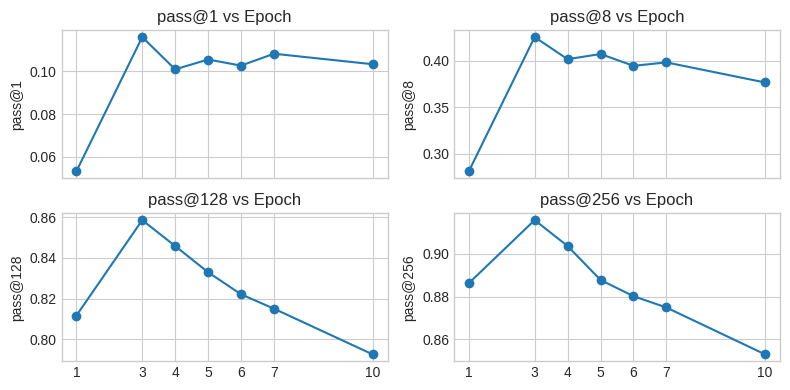

In [15]:
all_metrics = {}
# Map from epoch number to (label, filename)

epochs = []

k_list = [1, 8, 128, 256]
pass_k = {k: [] for k in k_list}

# problem_idx = 10
for epoch, label, fname in epoch_files:
    with open(fname, encoding='utf-8') as f:
        metrics = json.load(f)['overall']
        pass_at_k = metrics['pass_at_k']
        # pass_at_k = metrics['detail_pass_at_k']
        # For safety, prefer safe index with fallback
        def get_metric(pk):
            if pk in pass_at_k:
                # return pass_at_k[pk][problem_idx]
                return pass_at_k[pk]
            # Try numeric keys if present
            if isinstance(pass_at_k, dict):
                for k in pass_at_k.keys():
                    if str(pk) == k or pk == k:
                        return pass_at_k[k]
            return float('nan')
        epochs.append(epoch)

        for k in k_list:
            pass_k[k].append(get_metric(f'pass@{k}'))

# X axis: epoch
# Y axis: pass@1, pass@16, pass@32
fig, axses = plt.subplots(2, len(k_list) // 2, figsize=(4 * (len(k_list) // 2), 4), sharex=True)

axses = axses.flatten()

for i, k in enumerate(k_list):
    axses[i].plot(epochs, pass_k[k], marker='o')
    axses[i].set_ylabel(f'pass@{k}')
    axses[i].set_title(f'pass@{k} vs Epoch')
    # Force integer x ticks
    axses[i].set_xticks(epochs)
    axses[i].set_xticklabels([str(e) for e in epochs])
    # axses[i].set_ylim(0, 1.1)

plt.tight_layout()
plt.show()

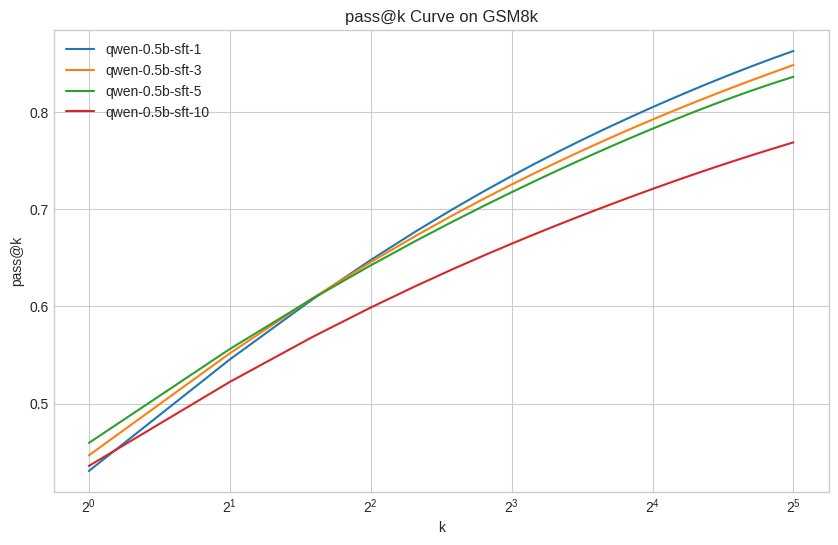

In [34]:
all_metrics = {}

with open("runs/gsm8k_prompt2.qwen2.5-0.5b/finished/sft_ep1.direct/sample_1/metrics.12.24,14:5.json", encoding='utf-8') as f:
    all_metrics['qwen-0.5b-sft-1'] = json.load(f)['overall']
# with open("runs/gsm8k_prompt2.qwen2.5-0.5b/finished/sft_ep2.direct/sample_1/metrics.12.24,14:10.json", encoding='utf-8') as f:
#     all_metrics['qwen-0.5b-sft-2'] = json.load(f)['overall']
with open("runs/gsm8k_prompt2.qwen2.5-0.5b/finished/sft_ep3.direct/sample_1/metrics.12.24,14:13.json", encoding='utf-8') as f:
    all_metrics['qwen-0.5b-sft-3'] = json.load(f)['overall']
# with open("runs/gsm8k_prompt2.qwen2.5-0.5b/finished/sft_ep4.direct/sample_1/metrics.12.24,14:18.json", encoding='utf-8') as f:
#     all_metrics['qwen-0.5b-sft-4'] = json.load(f)['overall']
with open("runs/gsm8k_prompt2.qwen2.5-0.5b/finished/sft_ep5.direct/sample_1/metrics.12.24,15:7.json", encoding='utf-8') as f:
    all_metrics['qwen-0.5b-sft-5'] = json.load(f)['overall']
with open("runs/gsm8k_prompt2.qwen2.5-0.5b/finished/sft_ep10.direct/sample_1/metrics.12.24,14:4.json", encoding='utf-8') as f:
    all_metrics['qwen-0.5b-sft-10'] = json.load(f)['overall']

plt.figure(figsize=(10,6))

for model_name, metrics in all_metrics.items():
    pass_at_k = metrics['pass_at_k']
    ks = [int(k.split('@')[1]) for k in pass_at_k.keys()]
    values = [pass_at_k[f'pass@{k}'] for k in ks]
    if 'rlzero' in model_name:
        plt.plot(ks, values, label=model_name, linestyle='--')
    else:
        plt.plot(ks, values, label=model_name)

plt.xlabel('k')
plt.ylabel('pass@k')
plt.title('pass@k Curve on GSM8k')
plt.xscale('log', base=2)
plt.grid(True)
plt.legend()
plt.show()

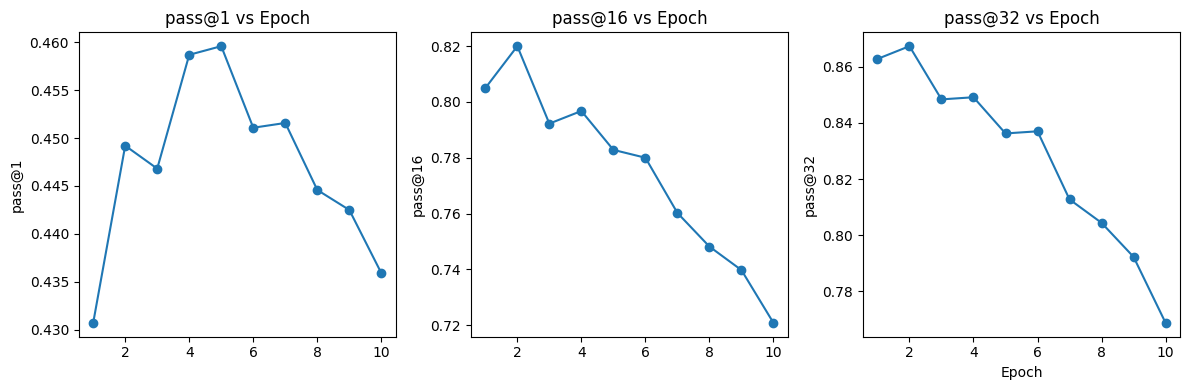

In [3]:
all_metrics = {}

# Map from epoch number to (label, filename)
epoch_files = [
    (1, 'qwen-0.5b-sft-1', "runs/gsm8k_prompt2.qwen2.5-0.5b/finished/sft_ep1.direct/sample_1/metrics.12.24,14:5.json"),
    (2, 'qwen-0.5b-sft-2', "runs/gsm8k_prompt2.qwen2.5-0.5b/finished/sft_ep2.direct/sample_1/metrics.12.24,14:10.json"),
    (3, 'qwen-0.5b-sft-3', "runs/gsm8k_prompt2.qwen2.5-0.5b/finished/sft_ep3.direct/sample_1/metrics.12.24,14:13.json"),
    (4, 'qwen-0.5b-sft-4', "runs/gsm8k_prompt2.qwen2.5-0.5b/finished/sft_ep4.direct/sample_1/metrics.12.24,14:18.json"),
    (5, 'qwen-0.5b-sft-5', "runs/gsm8k_prompt2.qwen2.5-0.5b/finished/sft_ep5.direct/sample_1/metrics.12.24,15:7.json"),
    (6, 'qwen-0.5b-sft-6', "runs/gsm8k_prompt2.qwen2.5-0.5b/finished/sft_ep6.direct/sample_1/metrics.12.24,15:8.json"),
    (7, 'qwen-0.5b-sft-7', "runs/gsm8k_prompt2.qwen2.5-0.5b/finished/sft_ep7.direct/sample_1/metrics.12.24,15:8.json"),
    (8, 'qwen-0.5b-sft-8', "runs/gsm8k_prompt2.qwen2.5-0.5b/finished/sft_ep8.direct/sample_1/metrics.12.24,15:8.json"),
    (9, 'qwen-0.5b-sft-9', "runs/gsm8k_prompt2.qwen2.5-0.5b/finished/sft_ep9.direct/sample_1/metrics.12.24,15:8.json"),
    (10, 'qwen-0.5b-sft-10', "runs/gsm8k_prompt2.qwen2.5-0.5b/finished/sft_ep10.direct/sample_1/metrics.12.24,14:4.json"),
]

epochs = []
pass1 = []
pass16 = []
pass32 = []

for epoch, label, fname in epoch_files:
    with open(fname, encoding='utf-8') as f:
        metrics = json.load(f)['overall']
        pass_at_k = metrics['pass_at_k']
        # For safety, prefer safe index with fallback
        def get_metric(pk):
            if pk in pass_at_k:
                return pass_at_k[pk]
            # Try numeric keys if present
            if isinstance(pass_at_k, dict):
                for k in pass_at_k.keys():
                    if str(pk) == k or pk == k:
                        return pass_at_k[k]
            return float('nan')
        epochs.append(epoch)
        pass1.append(get_metric('pass@1'))
        pass16.append(get_metric('pass@16'))
        pass32.append(get_metric('pass@32'))

# X axis: epoch
# Y axis: pass@1, pass@16, pass@32
fig, axs = plt.subplots(1, 3, figsize=(12, 4), sharex=True)

axs[0].plot(epochs, pass1, marker='o')
axs[0].set_ylabel('pass@1')
axs[0].set_title('pass@1 vs Epoch')

axs[1].plot(epochs, pass16, marker='o')
axs[1].set_ylabel('pass@16')
axs[1].set_title('pass@16 vs Epoch')

axs[2].plot(epochs, pass32, marker='o')
axs[2].set_xlabel('Epoch')
axs[2].set_ylabel('pass@32')
axs[2].set_title('pass@32 vs Epoch')

plt.tight_layout()
plt.show()

In [ ]:
# 77, 69, 33, 27, 35, 10, 55, 17,  6, 50, 81, 65, 53, 39,  0, 99, 94, 89,
#         40,  4, 19, 22, 72, 84, 66, 71, 37, 85,  9, 36, 31, 42, 38, 54, 56, 96,
#         52, 95, 93,  3, 61, 23,  2, 28, 49, 83, 57, 87, 70, 86, 76, 68, 79, 46,
#         45, 58, 21, 88, 91, 11, 75, 43, 20, 15,  8, 29, 14, 32, 51,  1, 92, 63,
#         67, 30, 59, 13, 26, 34, 44, 12, 41, 90, 62, 78, 47, 80, 97, 82, 98, 60,
#         24, 25, 18, 16, 73, 64,  7, 74,  5, 48

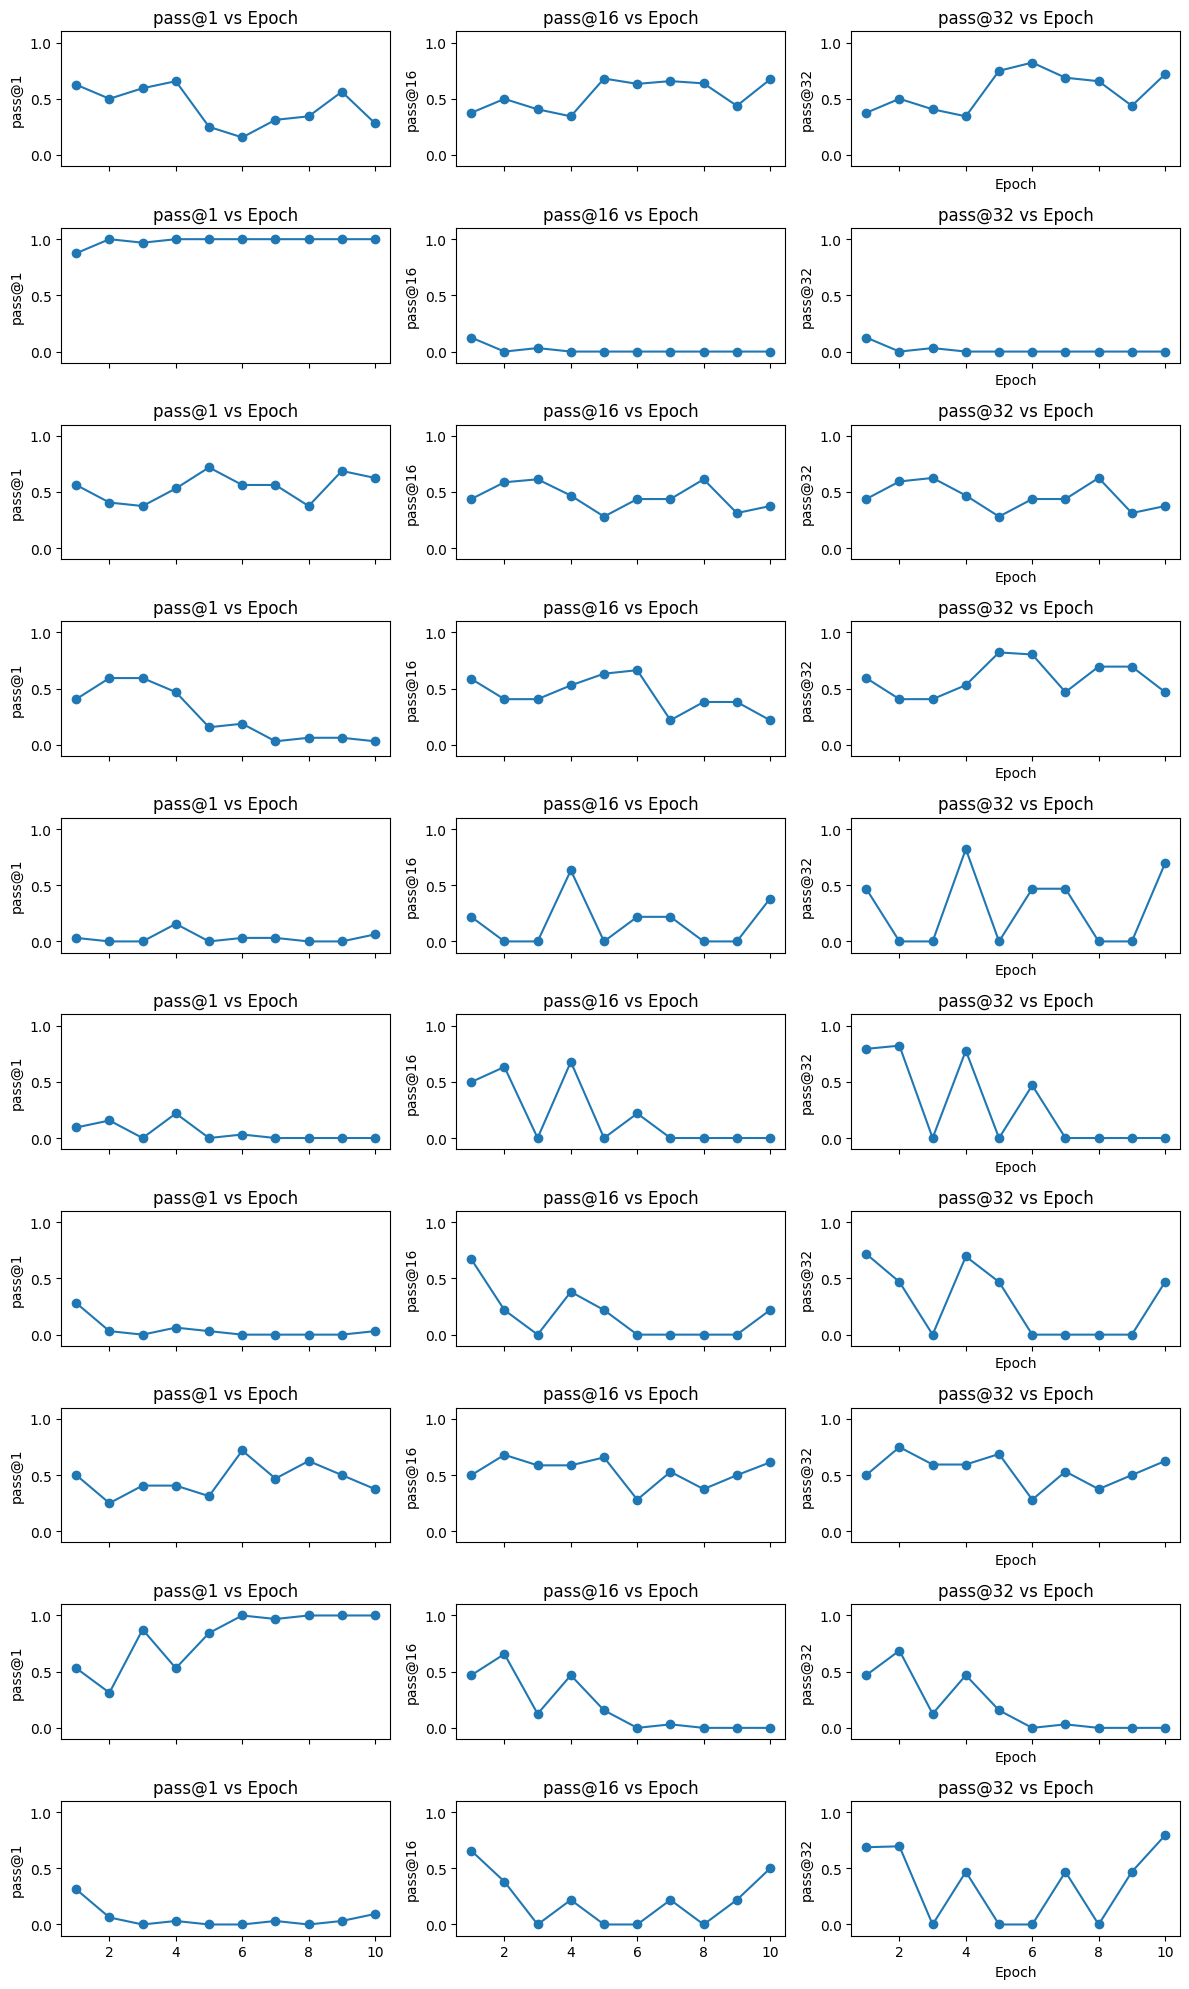

In [31]:
all_metrics = {}

# Map from epoch number to (label, filename)
epoch_files = [
    (1, 'qwen-0.5b-sft-1', "runs/gsm8k_prompt2.qwen2.5-0.5b/finished/sft_ep1.direct/sample_1/metrics.12.24,14:5.json"),
    (2, 'qwen-0.5b-sft-2', "runs/gsm8k_prompt2.qwen2.5-0.5b/finished/sft_ep2.direct/sample_1/metrics.12.24,14:10.json"),
    (3, 'qwen-0.5b-sft-3', "runs/gsm8k_prompt2.qwen2.5-0.5b/finished/sft_ep3.direct/sample_1/metrics.12.24,14:13.json"),
    (4, 'qwen-0.5b-sft-4', "runs/gsm8k_prompt2.qwen2.5-0.5b/finished/sft_ep4.direct/sample_1/metrics.12.24,14:18.json"),
    (5, 'qwen-0.5b-sft-5', "runs/gsm8k_prompt2.qwen2.5-0.5b/finished/sft_ep5.direct/sample_1/metrics.12.24,15:7.json"),
    (6, 'qwen-0.5b-sft-6', "runs/gsm8k_prompt2.qwen2.5-0.5b/finished/sft_ep6.direct/sample_1/metrics.12.24,15:8.json"),
    (7, 'qwen-0.5b-sft-7', "runs/gsm8k_prompt2.qwen2.5-0.5b/finished/sft_ep7.direct/sample_1/metrics.12.24,15:8.json"),
    (8, 'qwen-0.5b-sft-8', "runs/gsm8k_prompt2.qwen2.5-0.5b/finished/sft_ep8.direct/sample_1/metrics.12.24,15:8.json"),
    (9, 'qwen-0.5b-sft-9', "runs/gsm8k_prompt2.qwen2.5-0.5b/finished/sft_ep9.direct/sample_1/metrics.12.24,15:8.json"),
    (10, 'qwen-0.5b-sft-10', "runs/gsm8k_prompt2.qwen2.5-0.5b/finished/sft_ep10.direct/sample_1/metrics.12.24,14:4.json"),
]




problem_ids = [161, 624, 448, 479, 409, 295, 281, 612, 431, 539]
# problem_ids = [ 63, 80, 82, 64, 73,  7,  5, 25, 97, 48]
# problem_ids = [570,  277,  799,   48, 1012, 1254,  256,  301,  471,  428]

# X axis: epoch
# Y axis: pass@1, pass@16, pass@32
fig, axs = plt.subplots(len(problem_ids), 3, figsize=(12, 2 * len(problem_ids)), sharex=True)

for c, problem_id in enumerate(problem_ids):
    epochs = []
    pass1 = []
    pass16 = []
    pass32 = []
    for epoch, label, fname in epoch_files:
        with open(fname, encoding='utf-8') as f:
            metrics = json.load(f)['overall']
            pass_at_k = metrics['detail_pass_at_k']
            # For safety, prefer safe index with fallback
            def get_metric(pk):
                if pk in pass_at_k:
                    return pass_at_k[pk][problem_id]
                # Try numeric keys if present
                if isinstance(pass_at_k, dict):
                    for k in pass_at_k.keys():
                        if str(pk) == k or pk == k:
                            return pass_at_k[k][problem_id]
                return float('nan')
            epochs.append(epoch)
            pass1.append(get_metric('pass@1'))
            pass16.append(get_metric('pass@8') - get_metric('pass@1'))
            pass32.append(get_metric('pass@16') - get_metric('pass@1'))

    
    axs[c, 0].plot(epochs, pass1, marker='o')
    axs[c, 0].set_ylabel('pass@1')
    axs[c, 0].set_title('pass@1 vs Epoch')
    axs[c, 0].set_ylim(-0.1, 1.1)

    axs[c, 1].plot(epochs, pass16, marker='o')
    axs[c, 1].set_ylabel('pass@16')
    axs[c, 1].set_title('pass@16 vs Epoch')
    axs[c, 1].set_ylim(-0.1, 1.1)

    axs[c, 2].plot(epochs, pass32, marker='o')
    axs[c, 2].set_xlabel('Epoch')
    axs[c, 2].set_ylabel('pass@32')
    axs[c, 2].set_title('pass@32 vs Epoch')
    axs[c, 2].set_ylim(-0.1, 1.1)

plt.tight_layout()
plt.show()